# <center> 4.Individuālais uzdevums/ 5.Praktiskā nodarbība <br><br> "Attēlu apstrādes pamati"

### Nodarbībā tiks apskatīts:
- Attēlu atvēršana,
- Pikseļu krāsu maiņa,
- Attēla informācijas nolase (izmērs, krāsu režīms, kanālu vērtības),
- Attēla krāsu režīma, krāsu bitu dziļuma maiņa,
- Attēla mērogošana / izmēra maiņa,
- Histogrammas izveide.

In [16]:
### Python pakotņu importēšana
#darbības ar masīviem
import numpy as np
from numpy import asarray

#attēlu apstrādes bibliotēkas
import cv2
from PIL import Image

#attēlu atvēršana/parādīšana Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
#pārbaudam vai opencv-python ir uzinstalēts - ja tiek dota klūda: pakotne nav pareizi uzinstalēta
                                          # - ja izpildās bez paziņojumiem: viss pareizi uzinstalēts
import cv2

(100, 300, 3)


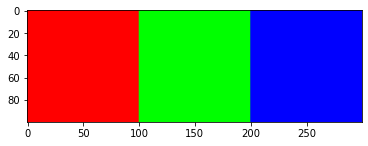

In [3]:
### Pamati strādājot ar masīviem un krāsām

                 # y    x   krāsu kanāli
array = np.zeros([100, 300, 3], dtype=np.uint8)

#visas vērtīvas y asī līdz 100 vertībām x asī
array[:, :100] = [255, 0, 0]   #Sarkans (R)
#visas y vērtības pēc masīva 100 pikseļiem x asī
array[:, 100:] = [0, 255, 0]   #Zaļš (G)
#visas y vērtības pēc masīva 200 pikseļiem x asī
array[:, 200:] = [0, 0, 255]   #Zils (B)

#%matplotlib notebook
img = Image.fromarray(array)

#formas izvade (augstums, platums, kanāli)
print(array.shape)

#saglabāt attēlu
img.save('test.png')

plt.imshow(img)

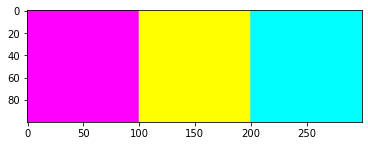

In [4]:
### Krāsu vērtību maiņa
im = cv2.imread('test.png')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#Aizvietot katru sarkano pikseli ar violetu pikseli
im_rgb[np.all(im_rgb == (255, 0, 0), axis=-1)] = (255, 0, 255)
#zaļš uz dzeltenu
im_rgb[np.all(im_rgb == (0, 255, 0), axis=-1)] = (255, 255, 0)
#zils uz azure
im_rgb[np.all(im_rgb == (0, 0, 255), axis=-1)] = (0, 255, 255)

#%matplotlib notebook
plt.imshow(im_rgb)

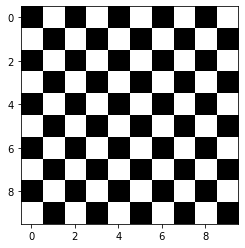

In [20]:
### Aizkrāsot noteiktu secību ar pikseļiem

array = np.zeros([10, 10], dtype=np.uint8)

#x un y robežas līdz 10
for x in range(10):
    for y in range(10):
        #katra otrā vērtība x un y asī
        if (x % 2) == (y % 2):
            array[y, x] = 0
        else:
            array[y, x] = 255

#%matplotlib notebook
img = Image.fromarray(array)
img.save('array.png')

img = cv2.imread('array.png')
plt.imshow(img)

In [6]:
### Attēla nolase un pārveidošana par masīvu

# konvertēt attēlu par numpy matricu
# "E://Datorgrafika_Un_AtteluApstrade_2020_RTU//Praktiskie_2020//6.Nodrabība_5.Individuālais//Lenna.png"
image = Image.open('Lenna.png')

print('Numpy image readings:')
data = asarray(image)
print(data.shape)
print()
print(data)

Numpy image readings:
(512, 512, 3)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


Pillow image readings:
Image dimensions/size: 
(512, 512)
Colour mode: 
RGB
Min/Max values of each channel: 
((54, 255), (3, 248), (8, 225))


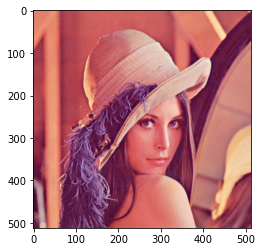

In [7]:
# Pillow attēla izveide no iepriekš konvertētajiem attēla numpy matricas datiem

print('Pillow image readings:')
image = Image.fromarray(data)

# Noteiktas attēla datu informācijas nolase
print("Image dimensions/size: ")
print(image.size)
print("Colour mode: ")
print(image.mode)
print("Min/Max values of each channel: ")
value = image.getextrema()
print(value)

#%matplotlib notebook
plt.imshow(image)

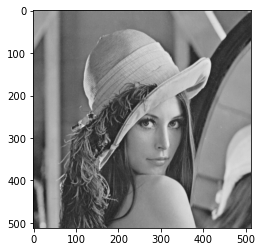

In [24]:
# Attēlu apstrāde - attēla pārveidošana par melnbaltu attēlu (grayscale)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#  return np.dot(rgb[:,:,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('Lenna.png')     
gray = rgb2gray(img)

#%matplotlib notebook
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

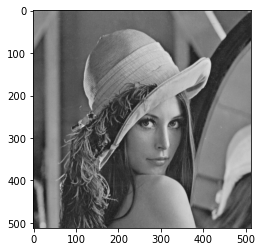

In [9]:
#Vienkāršāka metode ar OpenCV
image = cv2.imread('Lenna.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

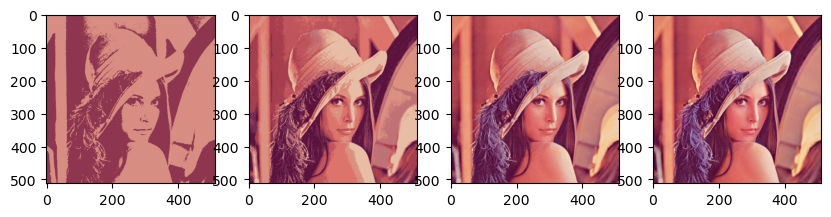

In [26]:
#Bitu/krāsu dziļuma (bit/color range) parametru maiņa

img = Image.open('Lenna.png')

img1 = img.convert("P", palette=Image.ADAPTIVE, colors=2)
img8 = img.convert("P", palette=Image.ADAPTIVE, colors=8)
img128 = img.convert("P", palette=Image.ADAPTIVE, colors=128)

#%matplotlib notebook

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(img8)
ax3 = fig.add_subplot(1,4,3)
ax3.imshow(img128)
ax4 = fig.add_subplot(1,4,4)
ax4.imshow(img)

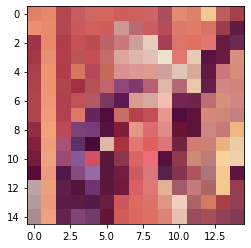

In [11]:
### Attēla izmēra maiņa, mērogošana

image = cv2.imread('Lenna.png')
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(im_rgb, (15,15))

plt.imshow(resized_img)

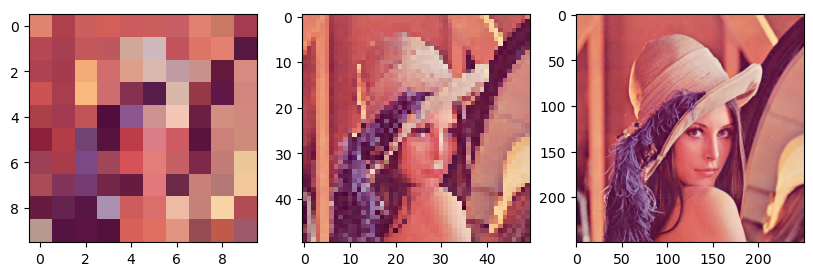

In [12]:
image = cv2.imread('Lenna.png')
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_img_1 = cv2.resize(im_rgb, (10,10))
resized_img_2 = cv2.resize(im_rgb, (50,50))
resized_img_3 = cv2.resize(im_rgb, (250,250))

#%matplotlib notebook

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(resized_img_1)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(resized_img_2)
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(resized_img_3)

[   0    0    0   11   65  111  164  261  315  431  537  682  847  912
 1074 1350 1480 1681 1621 2064 1835 2048 1989 1911 2258 2129 1748 1776
 1850 1687 1605 1661 1355 1360 1189 1278 1062 1027 1052 1084 1013 1029
  917  933 1043 1037 1069  942 1218 1194 1116 1467 1410 1699 1855 2139
 2538 2906 2886 3475 3856 4072 4367 5009 4701 4951 4621 4982 4648 4776
 4705 4988 4705 4994 4819 5065 5176 5000 5146 5320 5003 5346 5141 5615
 5167 5486 5742 5831 6199 6261 6087 6566 6738 6420 6610 6534 6723 6568
 5833 6461 5798 5813 5598 5862 5370 5456 4938 5066 5089 4884 4878 4835
 5034 4968 4713 5150 4947 5049 5063 5165 5231 5373 4813 5129 5234 5218
 4942 4720 4791 4657 4283 4692 4000 3966 3938 3927 3830 3759 3271 3252
 3249 3086 2914 2975 2865 2900 2477 2759 2487 2627 2550 2590 2643 2727
 2542 2557 2599 2615 2611 2811 2406 2616 2392 2498 2228 2411 2295 2476
 2287 2522 2461 2670 2784 2833 2881 2901 3169 2985 2727 2995 2725 2852
 2708 2664 2862 2809 2689 2709 2929 2867 2724 2762 2932 2993 2698 2998
 2704 

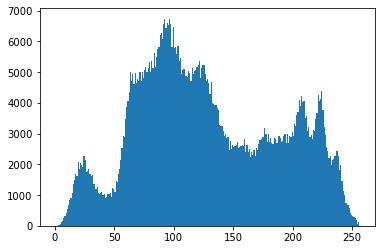

In [13]:
### Attēla histogrammas izveide

image = cv2.imread('Lenna.png')
hist,bins = np.histogram(image.ravel(),256,[0,256])

print(hist)
#%matplotlib notebook
plt.hist(image.ravel(),256,[0,256])
plt.show()

<br>
<br>

Kad attēla fails tiek atvērts ar OpenCV bibliotēkas funkciju imread(), nolasītā krāsu kanālu secība ir BGR (blue,green,red), toties, ja tiek izmantota Pillow bibliotēka, krāsu secība ir standarta RGB (red,green,blue).

Darbojoties ar OpenCV un Jupyter Notebook svarīgi atcerēties, ka importētos attēlus nepieciešams pārveidot no BGR uz RGB krāsu sistēmu, citādāk krāsu kanālu nolase būs neprecīza un atvērtā attēla krāsas būs apgrieztas (jo pirmais kanāls tādējādi būtu zilais (B)). 

Nepārveidota/nepareiza un korekti pārveidota attēla piemēri ar to histogrammām (attēlota pirmā krāsu kanāla vērtība) aplūkojami nākošajā piemērā.

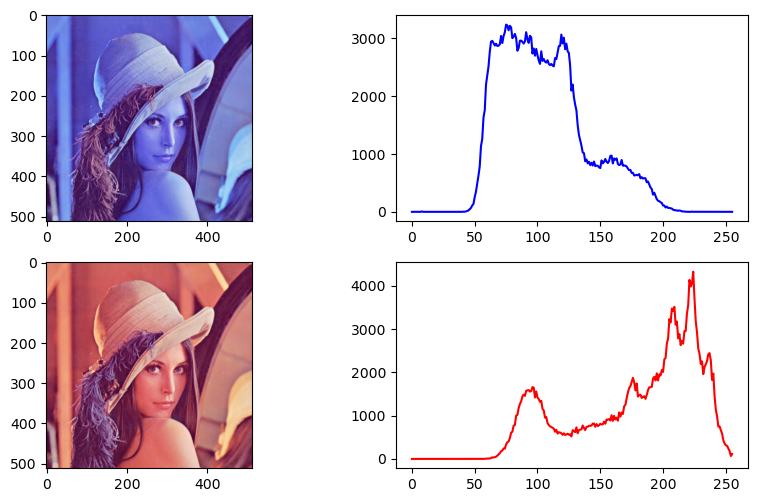

In [14]:
image = cv2.imread('Lenna.png')

im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Read the first channel of the image [0] and draw a histogram
hist = cv2.calcHist([image],[0],None,[256],[0,256])
hist2 = cv2.calcHist([im_rgb],[0],None,[256],[0,256])

#%matplotlib notebook

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.plot(hist, color = 'b')

ax1 = fig.add_subplot(2,2,3)
ax1.imshow(im_rgb)
ax2 = fig.add_subplot(2,2,4)
ax2.plot(hist2, color = 'r')

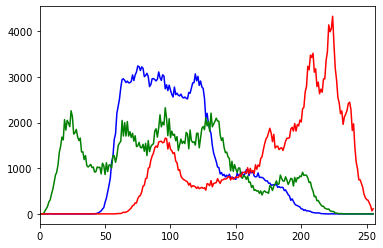

In [15]:
# Nolasīt katras krāsas kanāla vērtības un tās izvadīt histogrammas formā

#%matplotlib notebook

img = cv2.imread('Lenna.png')
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

----

## <center> 4.Individuālais uzdevums

<b>Darba uzdevums</b> :
    
Balstoties uz pēdējiem 3 studentu apliecības numura cipariem, atvērt kādu brīvi izvēlētu attēlu, mērogojot attēlu tā, lai tā izmēri būtu platumā 500 pikseļi un augstumā 500 pikseļi (500,500) un iekrāsot atbilstošā attēla katru N-to pikseli uz X ass un katru M-to pikseli uz Y ass noteiktā krāsā (zaļā, sarkanā vai citā, balstoties uz variantu!) . <br> <br>
N un M vērtības, kā arī krāsa kādā jāiekrāso atbilstošie pikseļi, ir pieejami 5.individuālā uzdevuma variantu sarakstā ORTUS vidē.

<br>

ORTUS vidē OBLIGĀTI nepieciešams iesniegt:
- Jupyter Notebook failu ("*.ipynb" formātā) ar individuālā uzdevuma izpildi

Pārskatā obligāti jāiekļauj:
- Darba un studenta informācija,
- Uzdevuma nostādne,
- Individuālā uzdevuma izpildes kods.

Individuālā uzdevuma izpildes failus jānosauc atbilstoši: "Pd4_apl_nr", piemēram,  ja Jūsu studentu apliecības numurs ir 200RDB154, tad gan pārskatu (PDF vai DOC/DOCX formātā), gan Notebook failu ("*.ipynb" formātā) jānosauc kā "PD4_200RDB154".

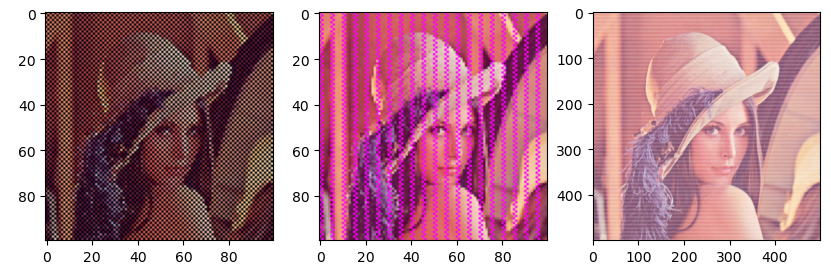

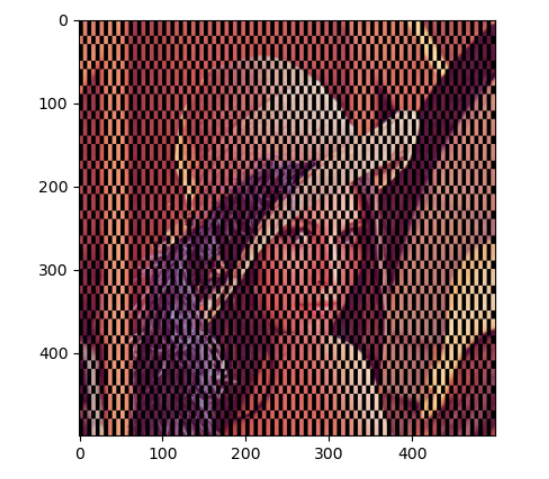